案例一：正弦曲线的拟合

In [52]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [53]:
# 设置随机种子
np.random.seed(46)
x = np.random.uniform(0,5,size=(80,1))
x = np.sort(x,axis=0)

In [54]:
# 对y=sin(x)进行降维，也就是把 y 变成一维数组
y = np.sin(x).ravel()

# 添加随机白噪声
e = np.random.randint(low=0,high=len(x),size=int(len(x)*0.2))
y[e] = y[e]+np.random.normal(0,1,int(len(x)*0.2))

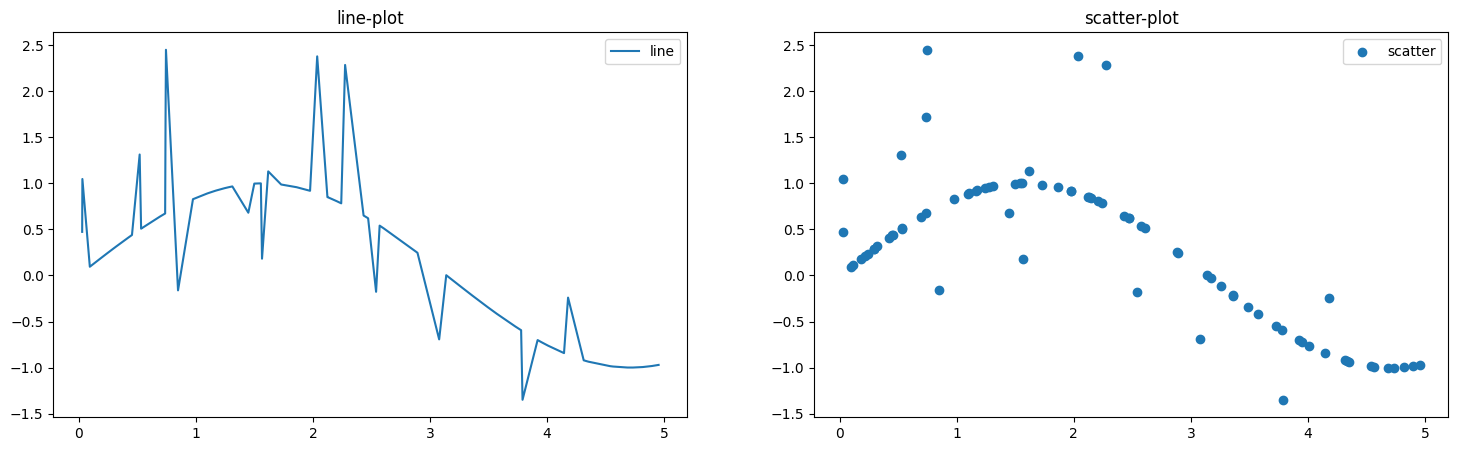

In [55]:
# 绘制子图
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(18,5))

axs[0].plot(x,y,label='line')
axs[0].set_title('line-plot')
axs[0].legend() 

axs[1].scatter(x,y,label='scatter')
axs[1].set_title('scatter-plot')
axs[1].legend() 
plt.show()

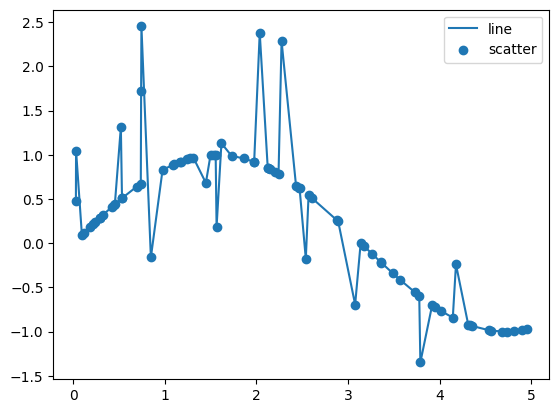

In [56]:
plt.plot(x,y,label='line')
plt.scatter(x,y,label='scatter')
plt.legend()
plt.show()

In [57]:
# 训练两颗回归树
reg_1=DecisionTreeRegressor(max_depth=2)
reg_1.fit(x,y)
reg_2=DecisionTreeRegressor(max_depth=5)
reg_2.fit(x,y)

DecisionTreeRegressor(max_depth=5)

In [58]:
# 生成测试集，需要将其转为二维数组,sklearn要求输入为二维数组
xtest=np.arange(0,5,0.01).reshape(-1,1)
ytest=np.sin(xtest)

# 用生成的回归树进行预测
y_1=reg_1.predict(xtest)
y_2=reg_2.predict(xtest)

# 对两棵树进行预测的评分
score_1=reg_1.score(xtest,ytest)
score_2=reg_2.score(xtest,ytest)
print(score_1,score_2)

0.9024612445298337 0.8071225004769798


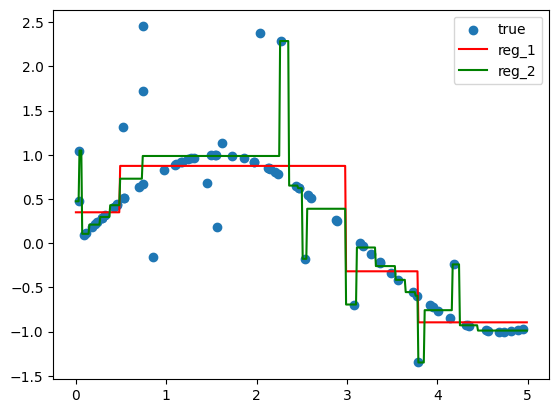

In [59]:
plt.figure()
plt.scatter(x,y,label='true')
# plt.plot(x,y,c='b',label='true')
plt.plot(np.arange(0,5,0.01),y_1,c='r',label='reg_1')
plt.plot(np.arange(0,5,0.01),y_2,c='g',label='reg_2')
plt.legend()
plt.show()

发现树的深度越深, 出现了过拟合的现象

案例二：泰坦尼克号乘客生存预测

In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
# 加载划分训练集,测试集的模块
from sklearn.model_selection import train_test_split
# 加载网格搜索模块
from sklearn.model_selection import GridSearchCV
# 加载交叉验证模块
from sklearn.model_selection import cross_val_score

In [61]:
data_train = pd.read_csv('D:\\dataset\\titanic\\train.csv',header=0,index_col=0)
data_test = pd.read_csv('D:\\dataset\\titanic\\test.csv',header=0,index_col=0) 

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


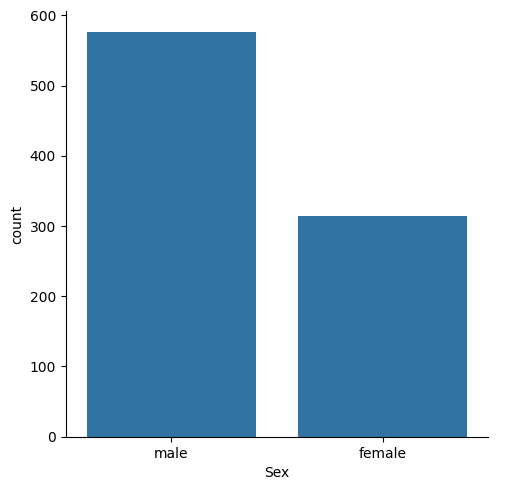

In [62]:
sns.catplot(x='Sex',data=data_train,kind='count')

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


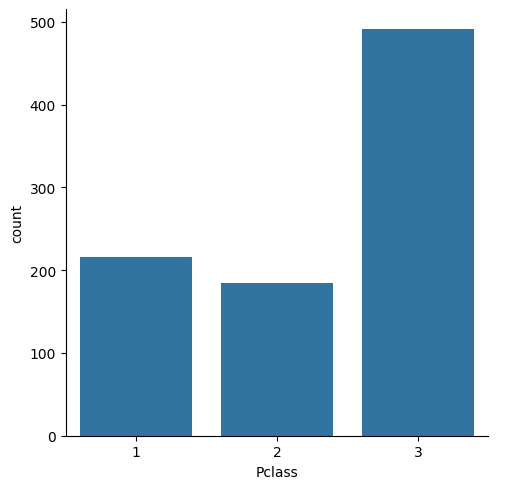

In [63]:
sns.catplot(x='Pclass',data=data_train,kind='count')

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


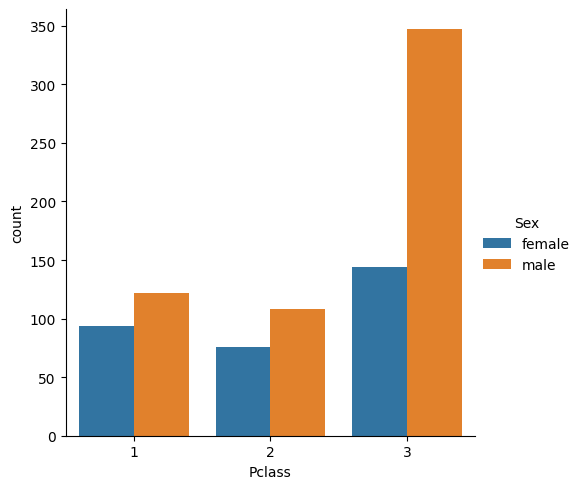

In [64]:
# hue表示按照什么特征进行分组,考虑多变量情况
sns.catplot(x='Pclass',data=data_train,hue='Sex',kind='count')

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


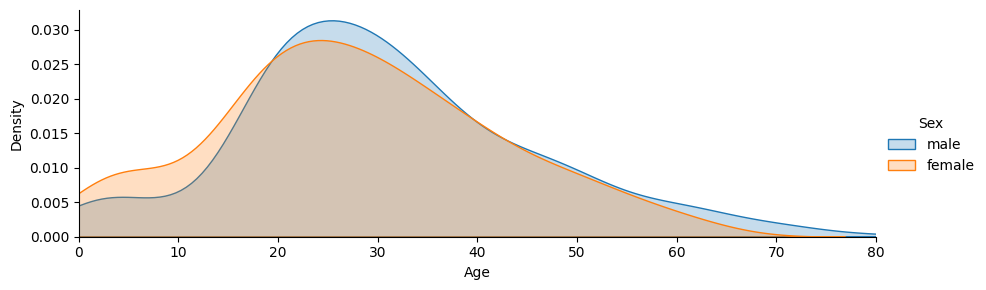

In [65]:
# 核密度分布图
as_fig=sns.FacetGrid(data_train,hue='Sex',aspect=3)
as_fig.map(sns.kdeplot,'Age',fill=True)
as_fig.set(xlim=(0,data_train['Age'].max()))
as_fig.add_legend()
plt.show()

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


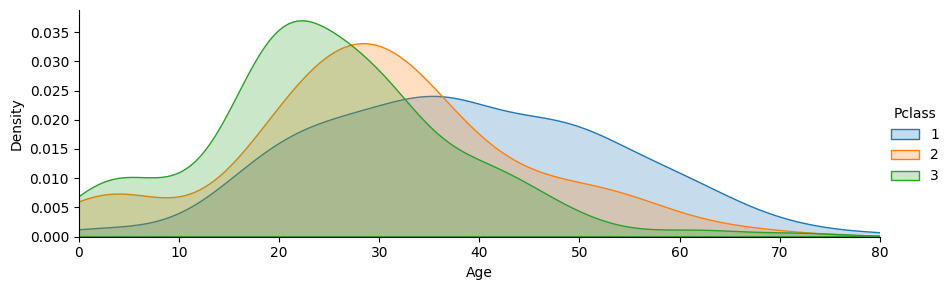

In [66]:
# 核密度分布图,aspect是图的纵横比
as_fig=sns.FacetGrid(data_train,hue='Pclass',aspect=3)
as_fig.map(sns.kdeplot,'Age',fill=True)
as_fig.set(xlim=(0,data_train['Age'].max()))
as_fig.add_legend()

In [67]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [68]:
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
# 删除缺失值过多的列，以及和标签无关的列
data_train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [71]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [72]:
# 处理缺失值, 缺失值过多, 就删除整行, 缺失值不多, 就进行填补
data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)
data_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


C:\Users\qiyu\AppData\Local\Temp\ipykernel_33440\4047862877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)


In [73]:
data_train.dropna(inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


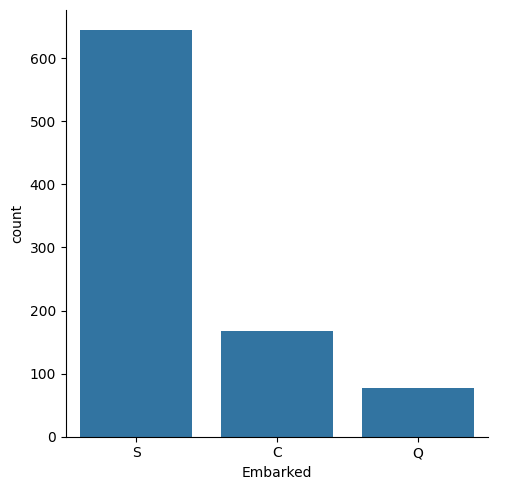

In [74]:
sns.catplot(x='Embarked',data=data_train,kind='count')

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


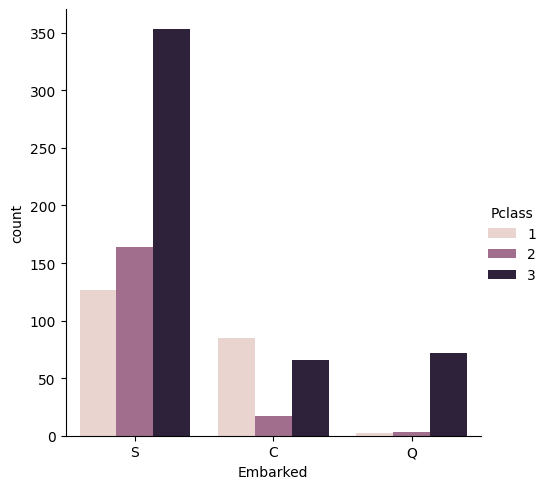

In [75]:
sns.catplot(x='Embarked',hue='Pclass',data=data_train,kind='count')

In [76]:
data_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S


In [77]:
data_train['alone']=data_train['SibSp']+data_train['Parch']

In [78]:
data_train['alone'].loc[data_train['alone']>0] = 'with family'
data_train['alone'].loc[data_train['alone']==0] = 'without family'

C:\Users\qiyu\AppData\Local\Temp\ipykernel_33440\2399864372.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_train['alone'].loc[data_train['alone']>0] = 'with family'
C:\Users\qiyu\AppData\Local\Temp\ipykernel_33440\2399864372.py:1: 

In [79]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,with family
2,1,1,female,38.000000,1,0,71.2833,C,with family
3,1,3,female,26.000000,0,0,7.9250,S,without family
4,1,1,female,35.000000,1,0,53.1000,S,with family
5,0,3,male,35.000000,0,0,8.0500,S,without family
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,without family
888,1,1,female,19.000000,0,0,30.0000,S,without family
889,0,3,female,29.699118,1,2,23.4500,S,with family


d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


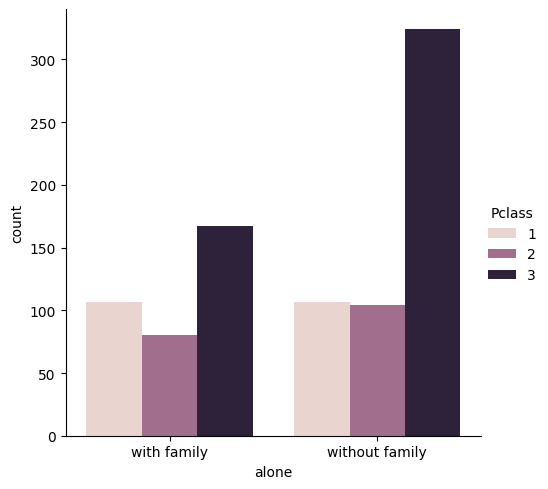

In [80]:
sns.catplot(x='alone',data=data_train,kind='count',hue='Pclass')

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


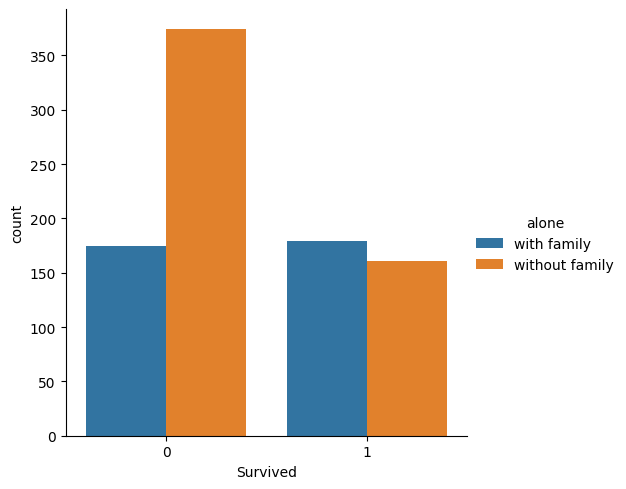

In [81]:
sns.catplot(x='Survived',hue='alone',kind='count',data=data_train)

d:\office_software\anaconda\install\envs\daily\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


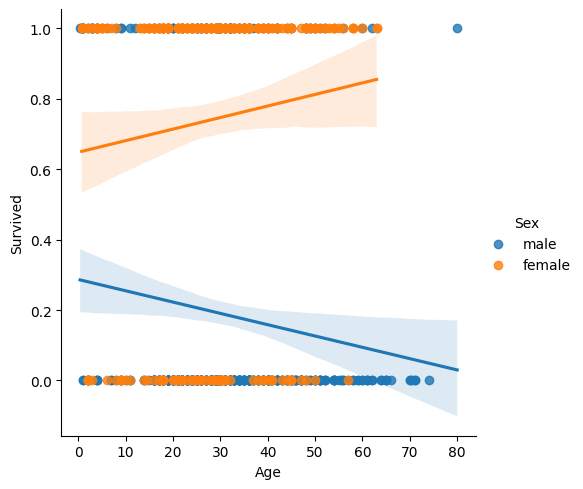

In [82]:
sns.lmplot(data=data_train,x='Age',y='Survived',hue='Sex')

In [83]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S,with family
2,1,1,female,38.000000,1,0,71.2833,C,with family
3,1,3,female,26.000000,0,0,7.9250,S,without family
4,1,1,female,35.000000,1,0,53.1000,S,with family
5,0,3,male,35.000000,0,0,8.0500,S,without family
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S,without family
888,1,1,female,19.000000,0,0,30.0000,S,without family
889,0,3,female,29.699118,1,2,23.4500,S,with family


对object 类型数据的直接转换

In [96]:
# 二分类变量直接转换
data_train['Sex']=(data_train['Sex']=='male').astype('int')
data_train['alone']=(data_train['alone']=='with family').astype('int')
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
PassengerId,,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0,0
2,1,1,0,38.000000,1,0,71.2833,1,0
3,1,3,0,26.000000,0,0,7.9250,0,0
4,1,1,0,35.000000,1,0,53.1000,0,0
5,0,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.000000,0,0,13.0000,0,0
888,1,1,0,19.000000,0,0,30.0000,0,0
889,0,3,0,29.699118,1,2,23.4500,0,0


In [95]:
# 获取特征值以及类别，返回的是一个列表, 列表的元素是不同的特征值，索引是[0,1,2]
# 对于'Embarked'的每个特征值, 获取它的索引值
label=data_train['Embarked'].unique().tolist()
data_train['Embarked']=data_train['Embarked'].apply(lambda x: label.index(x))
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
PassengerId,,,,,,,,,
1,0,3,1,22.000000,1,0,7.2500,0,1
2,1,1,0,38.000000,1,0,71.2833,1,1
3,1,3,0,26.000000,0,0,7.9250,0,0
4,1,1,0,35.000000,1,0,53.1000,0,1
5,0,3,1,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.000000,0,0,13.0000,0,0
888,1,1,0,19.000000,0,0,30.0000,0,0
889,0,3,0,29.699118,1,2,23.4500,0,1


下面进行训练过程

In [97]:
x=data_train.iloc[:,data_train.columns!='Survived']
y=data_train.iloc[:,data_train.columns=='Survived']
x,y

(             Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  alone
 PassengerId                                                                
 1                 3    0  22.000000      1      0   7.2500         0      0
 2                 1    0  38.000000      1      0  71.2833         1      0
 3                 3    0  26.000000      0      0   7.9250         0      0
 4                 1    0  35.000000      1      0  53.1000         0      0
 5                 3    0  35.000000      0      0   8.0500         0      0
 ...             ...  ...        ...    ...    ...      ...       ...    ...
 887               2    0  27.000000      0      0  13.0000         0      0
 888               1    0  19.000000      0      0  30.0000         0      0
 889               3    0  29.699118      1      2  23.4500         0      0
 890               1    0  26.000000      0      0  30.0000         1      0
 891               3    0  32.000000      0      0   7.7500         2      0

In [87]:
# 需要重新设置索引值
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain.reset_index(drop=True,inplace=True)
xtest.reset_index(drop=True,inplace=True)
ytrain.reset_index(drop=True,inplace=True)
ytest.reset_index(drop=True,inplace=True)

In [88]:
xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
0,1,0,60.000000,1,0,75.2500,1,1
1,1,0,42.000000,0,0,227.5250,1,0
2,1,1,56.000000,0,0,30.6958,1,0
3,3,1,40.000000,1,4,27.9000,0,1
4,3,1,29.699118,0,0,7.2500,0,0
...,...,...,...,...,...,...,...,...
617,2,1,29.699118,0,0,0.0000,0,0
618,3,1,33.000000,0,0,7.8958,0,0
619,1,1,29.000000,1,0,66.6000,0,1
620,3,1,29.699118,0,0,15.5000,2,0


In [89]:
clf=DecisionTreeClassifier(random_state=80,max_depth=10)
clf.fit(xtrain,ytrain)
clf.score(xtest,ytest)

0.7640449438202247

In [90]:
cross_val_score(clf,x,y,cv=10).mean()

0.7953140960163433

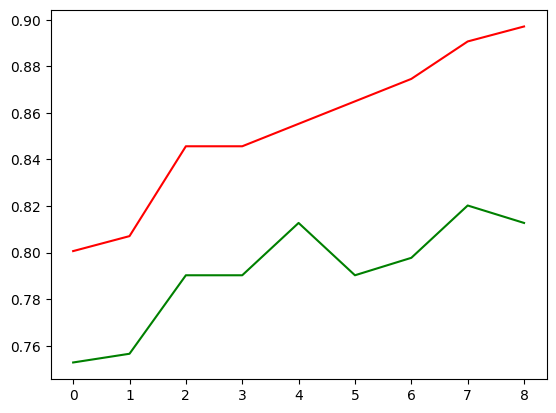

In [99]:
# 针对单一参数进行调参, 绘制学习曲线
tr=[]
test=[]
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i,criterion='entropy')
    clf.fit(xtrain,ytrain)
    tr.append(clf.score(xtrain,ytrain))
    test.append(clf.score(xtest,ytest))
plt.plot(tr,c='r',label='train')
plt.plot(test,c='g',label='test')

使用网格搜索的办法进行调参

In [101]:
# 网格搜索的调参过程
# GridSearchCV(clf,param_grid,cv=10),param_grid是一个字典，key是参数名，value是参数的取值范围,cv是交叉验证的折数
clf = DecisionTreeClassifier(random_state=46)
GS = GridSearchCV(clf,param_grid={'max_depth':range(1,10),'min_samples_leaf':range(1,10),'criterion':['gini','entropy']},cv=10)
GS.fit(xtrain,ytrain)
GS.score(xtest,ytest)

0.7902621722846442

In [102]:
GS.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}